(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


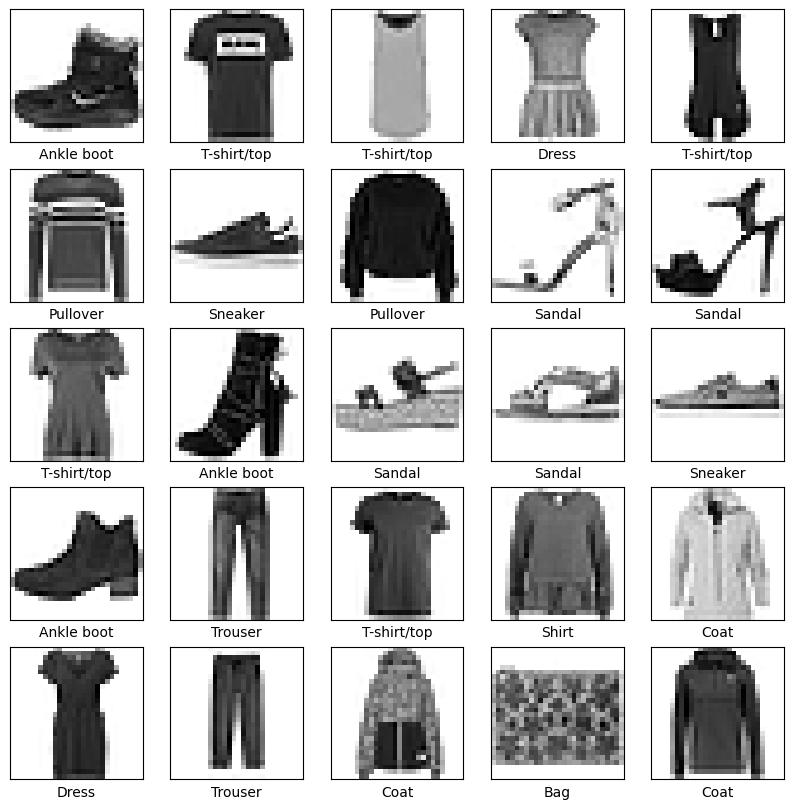

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4982 - accuracy: 0.8255
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - accuracy: 0.8634
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3351 - accuracy: 0.8760
Epoch 

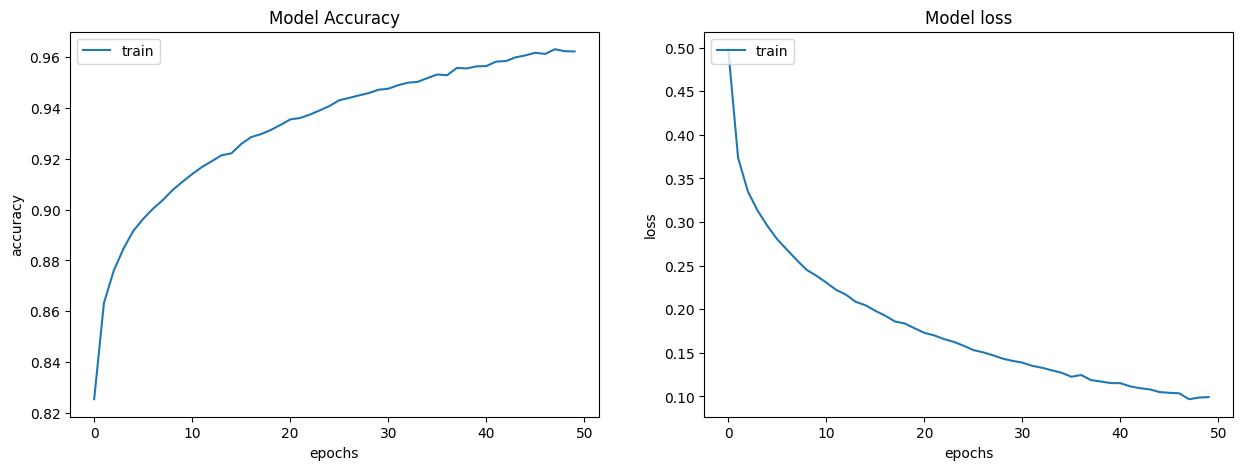

: 

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

def show_image_grids(train_images, train_labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

def create_model(input_shape, output_shape):
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(output_shape, activation=tf.nn.softmax)
  ])
  return model

def show_train_result(history):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  ax[0].plot(history.history["accuracy"])
  ax[0].set_title("Model Accuracy")
  ax[0].set_xlabel("epochs")
  ax[0].set_ylabel("accuracy")
  ax[0].legend(["train", "val"], loc="upper left")

  ax[1].plot(history.history["loss"])
  ax[1].set_title("Model loss")
  ax[1].set_xlabel("epochs")
  ax[1].set_ylabel("loss")
  ax[1].legend(["train", "val"], loc="upper left")

  plt.show()
  pass

if __name__ == '__main__':
  fashion_mnist = keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  print(train_images.shape)
  print(train_labels.shape)
  print(test_images.shape)
  print(test_labels.shape)
    
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  show_image_grids(train_images, train_labels) 
    
  # Steps 3~8 (10 points)
  train_images = train_images / 255.0
  test_images = test_images / 255.0

  model = create_model(input_shape=(28, 28, 1), output_shape=(10))
  model.summary()
  model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
  )
  checkpoint_path = "ckpt_fashion/cp-{epoch:04d}.ckpt"
  cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, period=5)
  # Steps 9, 10 (5 points)
  history = model.fit(train_images, train_labels, epochs=50, callbacks =[cp_callback])
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  show_train_result(history=history)

  # Step 12 (5 points)

  # Step 13 (10 points)

  # Step 14 (10 points)

313/313 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8753
loss = 0.3473692834377289, acc = 0.8752999901771545
313/313 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8866
loss = 0.3344281017780304, acc = 0.8866000175476074
313/313 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8829
loss = 0.35223832726478577, acc = 0.8828999996185303
313/313 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8863
loss = 0.35466641187667847, acc = 0.8863000273704529
cp-0020 acc : 0.8863


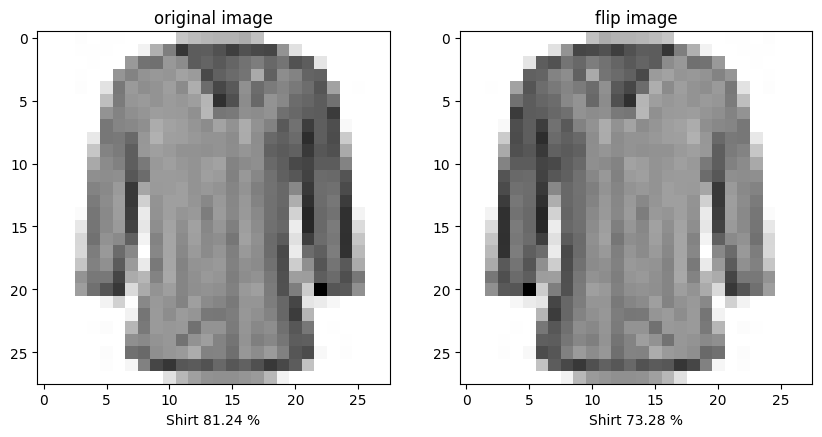

In [21]:
# step 12-14
weight_path = "./ckpt_fashion/cp-0005.ckpt"
model.load_weights(weight_path)
loss, acc = model.evaluate(test_images, test_labels)
print(f"loss = {loss}, acc = {acc}")

weight_path = "./ckpt_fashion/cp-0010.ckpt"
model.load_weights(weight_path)
loss, acc = model.evaluate(test_images, test_labels)
print(f"loss = {loss}, acc = {acc}")

weight_path = "./ckpt_fashion/cp-0015.ckpt"
model.load_weights(weight_path)
loss, acc = model.evaluate(test_images, test_labels)
print(f"loss = {loss}, acc = {acc}")

weight_path = "./ckpt_fashion/cp-0020.ckpt"
model.load_weights(weight_path)
loss, acc = model.evaluate(test_images, test_labels)
print(f"loss = {loss}, acc = {acc}")

# step 13
checkpoint_path = "ckpt_fashion/cp-0020.ckpt"
model.load_weights(checkpoint_path)
prob = model.predict(test_images)
predictions = np.argmax(prob, axis=1)
test_acc = np.mean(predictions==test_labels)
print(f"cp-0020 acc : {test_acc}")

# step 14
def display_pred_result(img):
  prob = model.predict(np.array([img]))
  predictions = np.argmax(prob, axis=1)
  img_flip = np.fliplr(img)
  prob_flip = model.predict(np.array([np.fliplr(img)]))
  prediction_flip = np.argmax(prob_flip, axis=1)

  fig, ax = plt.subplots(1, 2, figsize=(10, 8))
  ax[0].imshow(img, cmap=plt.cm.binary)
  ax[0].grid(False)
  ax[0].set_xlabel(f"{class_names[predictions[0]]} {np.max(prob)*100:.2f} %")
  ax[0].set_title("original image")
  ax[1].imshow(img_flip, cmap=plt.cm.binary)
  ax[1].grid(False)
  ax[1].set_xlabel(f"{class_names[prediction_flip[0]]} {np.max(prob_flip)*100:.2f} %")
  ax[1].set_title("flip image")
  pass

display_pred_result(test_images[4])

# Question 1. 
## What is the difference between the following two options in model.compile()? (5 points)
 - loss='categorical_crossentropy'
 - loss='sparse_categorical_crossentropy'
## Use an example to illustrate the difference. Write down your answer here.

## ANS
categorical_crossentropy usually used for the target variable is one-hot-encoded, and the sparse_categorical_crossentropy is used for the target variable is integer representing just like this assignment does.

$ L_{CE}= - \sum^{n}_{i=1}=t_i log(p_i), \quad\text{for n classes}$

The categorical_crossentropy recieve $t_i$ in one-hot encoded format, and sparse_categorical_crossentropy recieve $t_i$ in integer-encoded format.